## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import chi2, kstest, norm
import seaborn as sns

## 1a) 

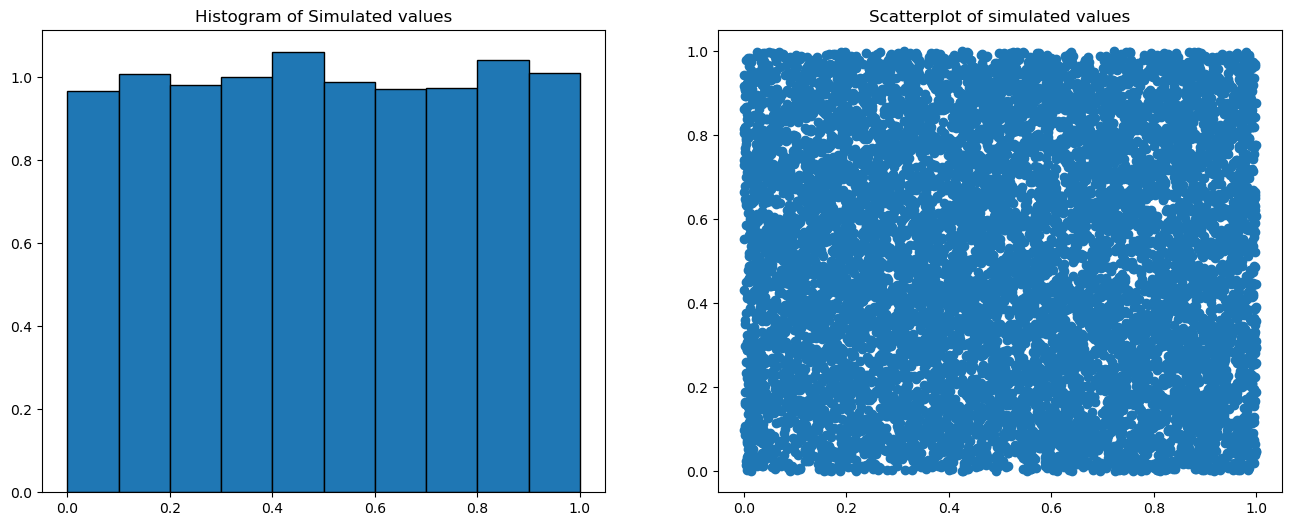

In [2]:
def LCG(x0, a,c,M,N):
    
    val = [((a*x0+c) % M)]

    for i in range(1,N):
        val.append( ((a*val[i-1]+c) % M) )

    return np.array(val)/M

randNum = LCG(3506,51234,1135,160000000,10000)

realNum = [random.uniform(0, 1) for i in range(10000)]

figure, axis = plt.subplots(1, 2,figsize=(16, 6)) 
axis[0].hist(randNum,10,density=True, edgecolor='black')
axis[0].set_title('Histogram of Simulated values')
axis[1].scatter(randNum,realNum)
axis[1].set_title('Scatterplot of simulated values')
plt.show()


## Evaluate Generator

In [4]:
# Chi-Square Test
def chi2_test(random_numbers, bins=10):
    expected_counts = len(random_numbers) / bins
    observed_counts, _ = np.histogram(random_numbers, bins=bins)
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
    p_value = chi2.sf(chi2_stat, df=bins-1)
    return chi2_stat, p_value

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(random_numbers):
    ks_stat, p_value = kstest(random_numbers, 'uniform')
    return ks_stat, p_value

# Above/Below Runs Test
def run_test_1(random_numbers):
    # above/below
    median = np.median(random_numbers)
    runs = np.sum(np.diff(np.sign(random_numbers - median)) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 1) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up/Down Runs Test
def run_test_2(random_numbers):
    # up/down
    runs = np.sum(np.diff(np.sign(np.diff(random_numbers))) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up-and-Down Runs Test
def run_test_3(random_numbers):
    # up_and_down 
    n = len(random_numbers)
    signs = np.sign(np.diff(random_numbers))
    runs = np.sum(np.diff(signs) != 0) + 1
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

def correlation_test(random_numbers):
    return np.corrcoef(random_numbers[:-1], random_numbers[1:])[0, 1]




In [5]:
params = [
    (10_000, 12345, 1103515245, 12345, 2**31),
    (10_000, 12345, 214013, 2531011, 2**32),
    (10_000, 12345, 1664525, 1013904223, 2**32),
    (10_000, 12345, 1, 0, 2**32),
    (10_000, 96734, 1664525, 1013904223, 2**32)
]

for n, seed, a, b, M in params:
    random_numbers = LCG(seed, a,b,M,n)
    print(f"Evaluating LCG with a={a}, b={b}, M={M}")
    chi,_ = chi2_test(random_numbers)
    ks,_ = kolmogorov_smirnov_test(random_numbers)
    rt1,_ = run_test_1(random_numbers)
    rt2,_ = run_test_2(random_numbers)
    rt3,_ = run_test_3(random_numbers)
    corr = correlation_test(random_numbers)
    print(np.round(chi,2),'  ',np.round(ks,2),'  ',np.round(rt1,2),'  ',np.round(rt2,2),'  ',np.round(rt3,2),'  ',np.round(corr,2))
    print(' ')

    

Evaluating LCG with a=1103515245, b=12345, M=2147483648
6.54    0.01    -37.7    1.06    1.06    -0.0
 
Evaluating LCG with a=214013, b=2531011, M=4294967296
5.76    0.01    -39.79    0.18    0.18    0.01
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
14.26    0.01    -37.01    1.06    1.06    -0.02
 
Evaluating LCG with a=1, b=0, M=4294967296
90000.0    1.0    -158.1    -158.07    -158.07    nan
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
6.28    0.01    -39.88    0.21    0.21    0.01
 


/Users/frederiknagel/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


## Apply System available generator

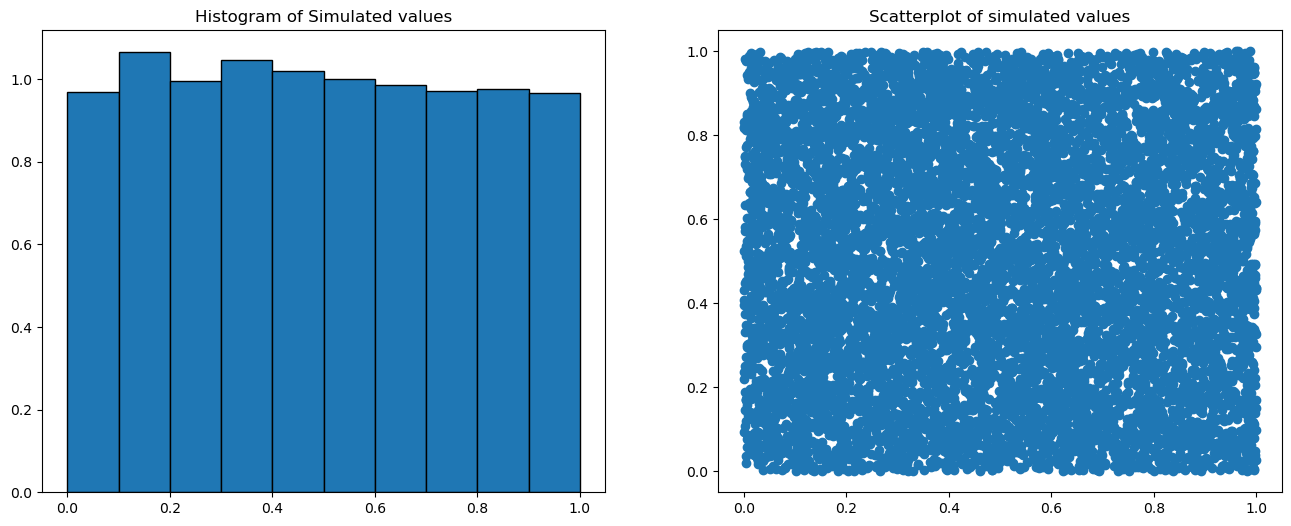

Evaluating LCG with a=1103515245, b=12345, M=2147483648
11.73    0.01    -39.9    0.04    0.04    0.01
 
Evaluating LCG with a=214013, b=2531011, M=4294967296
6.54    0.01    -39.6    -0.03    -0.03    0.0
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
6.51    0.01    -39.76    -0.08    -0.08    0.01
 
Evaluating LCG with a=1, b=0, M=4294967296
18.47    0.01    -41.07    -1.22    -1.22    0.01
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
11.63    0.02    -38.39    0.3    0.3    -0.01
 


In [6]:
rng = np.random.default_rng()
random_numbers = rng.random(n)

figure, axis = plt.subplots(1, 2,figsize=(16, 6)) 
axis[0].hist(random_numbers,10,density=True, edgecolor='black')
axis[0].set_title('Histogram of Simulated values')
axis[1].scatter(random_numbers,realNum)
axis[1].set_title('Scatterplot of simulated values')
plt.show()

for n, seed, a, b, M in params:
    rng = np.random.default_rng()
    random_numbers = rng.random(n)
    print(f"Evaluating LCG with a={a}, b={b}, M={M}")
    chi,_ = chi2_test(random_numbers)
    ks,_ = kolmogorov_smirnov_test(random_numbers)
    rt1,_ = run_test_1(random_numbers)
    rt2,_ = run_test_2(random_numbers)
    rt3,_ = run_test_3(random_numbers)
    corr = correlation_test(random_numbers)
    print(np.round(chi,2),'  ',np.round(ks,2),'  ',np.round(rt1,2),'  ',np.round(rt2,2),'  ',np.round(rt3,2),'  ',np.round(corr,2))
    print(' ')

No. of points in each bin :  [ 982  984 1008  993 1017 1001  979 1021 1023  992]
Size of the bins          :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
No. of points in each bin :  [ 987 1012  976 1030  978  991 1029 1021 1018  958]
Size of the bins          :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


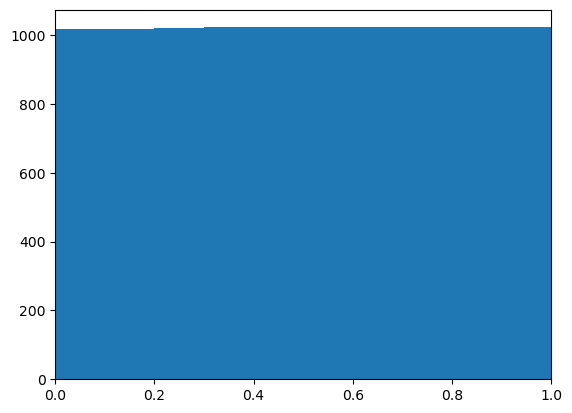

In [112]:
import scipy 
import numpy as np  
import matplotlib.pyplot as plt 
import numpy
  
hist_rand, bin_edges_rand = numpy.histogram(randNum, 
                                       bins = np.arange(0, 1.1, 0.1).tolist()) 
  
# Checking the results 
print ("No. of points in each bin : ", hist_rand) 
print ("Size of the bins          : ", bin_edges_rand) 
  
hist_real, bin_edges_real = numpy.histogram(realNum, 
                                       bins = np.arange(0, 1.1, 0.1).tolist()) 
  
# Checking the results 
print ("No. of points in each bin : ", hist_real) 
print ("Size of the bins          : ", bin_edges_real) 

# plotting the histogram 
plt.bar(bin_edges_rand[:-1], hist_rand, width = 1) 
plt.xlim(min(bin_edges_rand), max(bin_edges_rand)) 
plt.show() 



In [116]:
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import uniform
from scipy.stats import chi2


import scipy.stats as stats



def chisquare(observed,expected):
    
    M = 10000
    chi_squared_stat = (((observed-expected)**2)/expected).sum()
    #print(chi_squared_stat)
    
    critical_value= chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 10-1)   # df= degree of freedom
 
    
    p_value = 1 - chi2.cdf(x=chi_squared_stat,  # Find the p-value
                                df=10-1)
    
    return critical_value, p_value
    

critical_value, p_value = chisquare(hist_rand,hist_real)

print(ks_stat)
print(p_value)

def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

def ks_uni(sample):
    # Sorts the sample
    sample.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.uniform.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return ks_stat,p_value


ks_stat,p_value = ks_uni(randNum)

print(ks_stat)
print(p_value)



0.007180843749999943
0.00047678949241292123
0.008330951645442064
0.48876328244851697


In [92]:
def runsTest(l, l_median): 
  
    runs, n1, n2 = 0, 0, 0
      
    # Checking for start of new run 
    for i in range(len(l)): 
          
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median): 
            runs += 1  
          
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
          
        # no. of negative values 
        else: 
            n2 += 1   
  
    runs_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
  
    z = (runs-runs_exp)/stan_dev 
  
    return z 


l_median= np.median(randNum)
  
Z = abs(runsTest(randNum, l_median)) 
  
print('Z-statistic= ', Z)

Z-statistic=  99.98499987498124


In [101]:
from scipy.stats import kstest
import random
 
# N = int(input("Enter number of random numbers: "))
N = 5
 
actual =[]
print("Enter outcomes: ")
for i in range(N):
    # x = float(input("Outcomes of class "+str(i + 1)+": "))
    actual.append(random.random())
 
print(actual)
x = kstest(randNum, "uniform")   
print(x)

Enter outcomes: 
[0.7487976096590259, 0.6281433813837614, 0.5868609137089481, 0.24689048001877412, 0.06143403893448929]
KstestResult(statistic=0.00641830624999995, pvalue=0.8020244737142815, statistic_location=0.83401830625, statistic_sign=-1)


In [103]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y


r = round(pearsonr(randNum, realNum)[0], 4)

print(r)
# no linear correlation 

#extract p-value (rounded to 4 decimal places) 
p = round(pearsonr(randNum, realNum)[1], 4)

print(p) 



-0.0084
0.3984


/var/folders/rl/2d6x2yy927z8k4n7s2v1ng3m0000gn/T/ipykernel_42001/547813045.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [117]:
import scipy 
import numpy

a = [5390,93648,1920,400,30000,84001]
c = [4563,235346,4235,76,23,56573]
M = [160000000, 320000000, 6891736428, 4562939575, 909283617, 123456789]

for i in range(len(a)):
    randNum = LCG(3506,a[i],c[i],M[i],10000)
    
    realNum = [random.uniform(0, 1) for i in range(10000)]

    hist_rand, bin_edges_rand = numpy.histogram(randNum, 
                                        bins = np.arange(0, 1.1, 0.1).tolist()) 

    hist_real, bin_edges_real = numpy.histogram(realNum, 
                                        bins = np.arange(0, 1.1, 0.1).tolist()) 

    critical_value, p_value = chisquare(hist_rand,hist_real)
    ks_stat,p_value = ks_uni(randNum)

    l_median= np.median(randNum)
    
    Z = abs(runsTest(randNum, l_median)) 
    
    r = round(pearsonr(randNum, realNum)[0], 4)

    print(critical_value,'     ',ks_stat,'       ',Z,'        ',r )




16.918977604620448       0.5552902062499999         96.35499682982491          0.0094
16.918977604620448       0.007180843749999943         99.98499987498124          -0.0103
16.918977604620448       0.008330951645442064         99.98499987498124          0.008
16.918977604620448       0.00741997510563136         99.98499987498124          0.0045
16.918977604620448       0.010341593126273141         99.98499987498124          0.0073
16.918977604620448       0.005665951149110171         99.98499987498124          0.0078


In [121]:


randNum = np.array([random.uniform(0, 1) for i in range(10000)])
    
realNum = [random.uniform(0, 1) for i in range(10000)]

hist_rand, bin_edges_rand = numpy.histogram(randNum, 
                                        bins = np.arange(0, 1.1, 0.1).tolist()) 

hist_real, bin_edges_real = numpy.histogram(realNum, 
                                        bins = np.arange(0, 1.1, 0.1).tolist()) 

critical_value, p_value = chisquare(hist_rand,hist_real)
ks_stat,p_value = ks_uni(randNum)

l_median= np.median(randNum)
    
Z = abs(runsTest(randNum, l_median)) 
    
r = round(pearsonr(randNum, realNum)[0], 4)

print(critical_value,'     ',ks_stat,'       ',Z,'        ',r )


16.918977604620448       0.005426311176215837         99.98499987498124          0.0018


In [124]:
# Assignment 3 
# we could do multiple simulations with different initial starting points and check average 

a = [5390,93648,1920,400,30000,84001]
c = [4563,235346,4235,76,23,56573]
M = [160000000, 320000000, 6891736428, 4562939575, 909283617, 123456789]
seed = [10,3506,20000, 45,872,900]

for i in range(len(a)):
    for j in range(len(seed)):
        critval = []
        ks = []
        z = []
        R = []

        randNum = LCG(seed[j],a[i],c[i],M[i],10000)
        
        realNum = [random.uniform(0, 1) for i in range(10000)]

        hist_rand, bin_edges_rand = numpy.histogram(randNum, 
                                            bins = np.arange(0, 1.1, 0.1).tolist()) 

        hist_real, bin_edges_real = numpy.histogram(realNum, 
                                            bins = np.arange(0, 1.1, 0.1).tolist()) 

        critical_value, p_value = chisquare(hist_rand,hist_real)
        ks_stat,p_value = ks_uni(randNum)

        l_median= np.median(randNum)
        
        Z = abs(runsTest(randNum, l_median)) 
        
        r = round(pearsonr(randNum, realNum)[0], 4)
        critval.append(critical_value)
        ks.append(ks_stat)
        z.append(Z)
        R.append(r)
    print(np.mean(critval),'     ',np.mean(ks),'       ',np.mean(z),'        ',np.mean(R))
    








16.918977604620448       0.57120708125         95.73531088292297          0.0156
16.918977604620448       0.011315956249999981         99.98499987498124          -0.0049


KeyboardInterrupt: 